# CSEC Thesis Exhibits

## Setup and network generation
Run the following shell command to generate individual networks.
```
sbatch driver/network/run.sh --perf
```
Use --help to see what other flags are available.

Run the following batch command to generate all batch files and reset.
```
chmod u+x driver/network/run_reset.bat
driver/network/run_reset.bat
```
Run the following batch command to generate all batch files, continuing on the progress of old networks.
```
chmod u+x driver/network/run_all.bat
driver/network/run_all.bat
```

In [2]:
import sys
sys.path.append(r'/vast/palmer/home.grace/ajw88/csec_v3')
import os
os.chdir(r'/vast/palmer/home.grace/ajw88')

In [3]:
from players.player import StupidPlayer, SimplePlayer
from players.compound_player import ISMCTS_Player, PIMCPlayer
from players.complex_player import MoreComplexPlayer, ComplexCheatingPlayer
from hearts.game import GameState
from hearts.arena import PlayerGrid, FourPlayerArena
from MCTS.pimc_translator import PerfInfo_MCTS
from MCTS.modules import Cheating_MCTS
from MCTS.QModule import QNetwork_MCTS
from pimc.sample import ensemble_cheating_sampleModule
from QLearn.state_translate import translate

In [4]:
import random
random.seed(491)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pickle
import tensorflow as tf

## Exhibit 0 - Optimal Amount of PIMC determinizations and MCTS iterations

Run the following shell command to generate Exhibit 0. 
```
sbatch driver/fig0/fig0.sh --pimc
sbatch driver/fig0/fig0.sh --mcts
sbatch driver/fig0/fig0.sh --expl
```

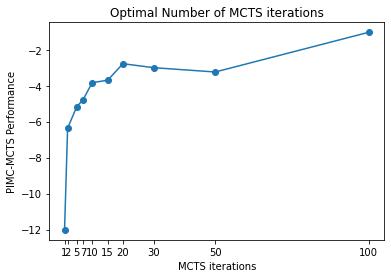

In [6]:
pkl_file = open(r'saves/fig0/fig0b.pkl', 'rb')
x, d_arr = pickle.load(pkl_file)
x = [i/200 for i in x]
pkl_file.close()

fig, ax = plt.subplots()
ax.plot(d_arr[:len(x)],x, '-o')
#ax.set_xscale('log')
plt.xticks(d_arr)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel("MCTS iterations")
plt.ylabel("PIMC-MCTS Performance")
plt.title("Optimal Number of MCTS iterations")

plt.savefig('saves/fig0/fig0b.png',bbox_inches="tight")
plt.show()

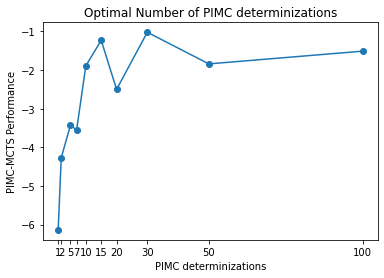

In [7]:
pkl_file = open(r'saves/fig0/fig0.pkl', 'rb')
x, d_arr = pickle.load(pkl_file)
x = [i/200 for i in x]
pkl_file.close()

fig, ax = plt.subplots()
ax.plot(d_arr[:len(x)],x, '-o')
#ax.set_xscale('log')
plt.xticks(d_arr)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel("PIMC determinizations")
plt.ylabel("PIMC-MCTS Performance")
plt.title("Optimal Number of PIMC determinizations")

plt.savefig('saves/fig0/fig0.png',bbox_inches="tight")
plt.show()

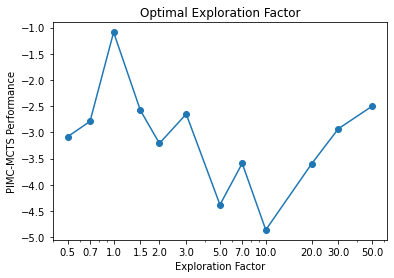

In [8]:
pkl_file = open(r'saves/fig0/fig0a.pkl', 'rb')
x, d_arr = pickle.load(pkl_file)
x = [i/200 for i in x]
pkl_file.close()

fig, ax = plt.subplots()
ax.plot(d_arr[:len(x)],x, '-o')
ax.set_xscale('log')
plt.xticks(d_arr)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel("Exploration Factor")
plt.ylabel("PIMC-MCTS Performance")
plt.title("Optimal Exploration Factor")

plt.savefig('saves/fig0/fig0a.png',bbox_inches="tight")
plt.show()

## Exhibit 1 - Relative Strength of Human Experience AIs and vs other neural networks

Run the following shell command to generate Exhibit 1. 
```
sbatch driver/fig1/fig1.sh --grid
```
WARNING: This will take a significant amount of time to run.

In [9]:
pkl_file = open(r'saves/fig1/fig1Grid-Copy1.pkl', 'rb')
grid = pickle.load(pkl_file)
pkl_file.close()
print(grid.num_iterations)

100


In [10]:
player_info = {0: 'Random Player',
1: 'Simple Heuristic Player',
2: 'Complex Heuristic Player, No Cheating',
3: 'PIMC Player (Determinized MCTS)',
4: 'Complex Heuristic Player, with Cheating',
5: 'Cheating MCTS'}

Heatmap of results. A black square would indicate a high win rate of the column player against the row player, and the opposite is true for white squares.

/tmp/ipykernel_17476/1974729920.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0'] + list(player_info.values()))
/tmp/ipykernel_17476/1974729920.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0'] + list(player_info.values()))


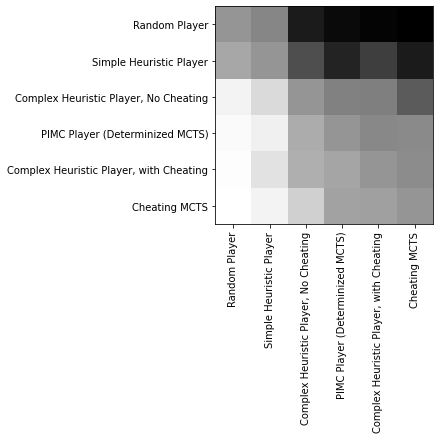

In [11]:
fig, ax = plt.subplots()
ax.imshow(np.array(grid.grid), cmap = 'Greys')
ax.set_xticklabels(['0'] + list(player_info.values()))
ax.set_yticklabels(['0'] + list(player_info.values()))
plt.xticks(rotation = 90)

plt.savefig('saves/fig1/fig1Grid.png',bbox_inches="tight")
plt.show()

Run the following shell command to generate Exhibit 1A (Neural Network in PIMC Context performance vs Agents)
```
sbatch driver/fig1/fig1.sh --pimc saves/perfect_info/fc/100
```
WARNING: This will take a significant amount of time to run.

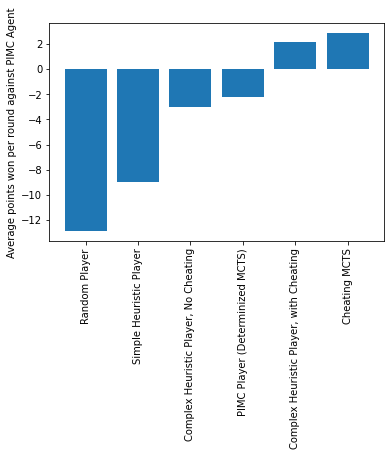

In [12]:
pkl_file = open(r'saves/fig1/fig1a_cmcts_fc_1.pkl', 'rb')
PIMC = pickle.load(pkl_file)
pkl_file.close()
PIMC = [i/200 for i in PIMC]

plt.bar(x = player_info.values(),height = PIMC)
plt.xticks(rotation = 90)
plt.ylabel("Average points won per round against PIMC Agent")

plt.savefig('saves/fig1/fig1a.png',bbox_inches="tight")
plt.show()

## Exhibit 2

Run the following shell command to generate a specific network for Exhibit 2. 
```
sbatch driver/fig2/fig2.sh --help
```

In [13]:
baseline = PIMC[5] - PIMC[4]

Run the following batch command to generate all batch files without reset for the PIMC player.
```
chmod u+x driver/fig2/fig2_all.bat
driver/fig2/fig2_all.bat
```
Run the following batch command to generate all batch files without reset for the cheating player.
```
chmod u+x driver/fig2/fig2_all_cheat.bat
driver/fig2/fig2_all_cheat.bat
```
Run the following batch command to generate all batch files with a RESET for the PIMC player.
```
chmod u+x driver/fig2/fig2_reset.bat
driver/fig2/fig2_reset.bat
```
Run the following batch command to generate all batch files with a RESET for the cheating player.
```
chmod u+x driver/fig2/fig2_cheat_reset.bat
driver/fig2/fig2_cheat_reset.bat
```

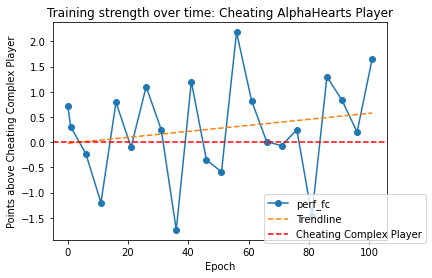

In [26]:
sublist = ['perf_fc']
fig, ax = plt.subplots()

pkl_file = open(r'saves/fig2/' + sublist[0] + '_cheat.pkl', 'rb')
x = pickle.load(pkl_file)
pkl_file.close()

x = [i/200 for i in x]
base = [0] + [i for i in range(1, len(x) * 5 + 1, 5)]
ax.plot(base,[baseline] + x, '-o', label = i)

#calculate equation for trendline
z = np.polyfit(base, [baseline] + x, 1)
p = np.poly1d(z)

#add trendline to plot
ax.plot(base, p(base), ls = '--', label = "Trendline")
        
plt.axhline(0, color='r', ls = '--', label = "Cheating Complex Player")

fig.legend(bbox_to_anchor =(1, .3))
plt.ylabel("Points above Cheating Complex Player")
plt.xlabel("Epoch")
plt.title("Training strength over time: Cheating AlphaHearts Player")

plt.savefig('saves/fig2/fig2a.png',bbox_inches="tight")
plt.show()

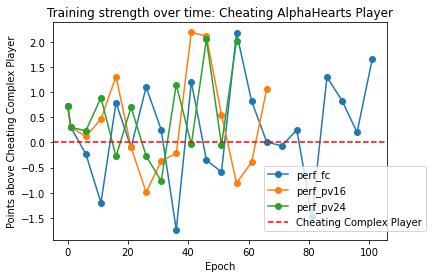

In [52]:
sublist = ['perf_fc','perf_pv16','perf_pv24']

fig, ax = plt.subplots()
for i in sublist:
    try:
        pkl_file = open(r'saves/fig2/' + i + '_cheat.pkl', 'rb')
    except FileNotFoundError:
        print("Did not find " + i)
    else:
        x = pickle.load(pkl_file)
        pkl_file.close()
        x = [i/200 for i in x]
        ax.plot([0] + [i for i in range(1, len(x) * 5 + 1, 5)],[baseline] + x, '-o', label = i)

plt.axhline(0, color='r', ls = '--', label = "Cheating Complex Player")

fig.legend(bbox_to_anchor =(1, .4))
plt.ylabel("Points above Cheating Complex Player")
plt.xlabel("Epoch")
plt.title("Training strength over time: Cheating AlphaHearts Player")

plt.savefig('saves/fig2/fig2b.png',bbox_inches="tight")
plt.show()

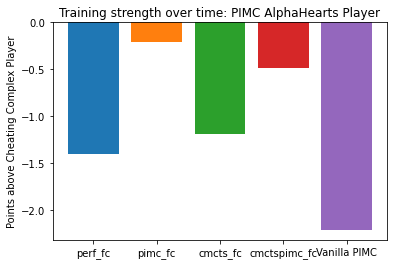

In [29]:
sublist = ['perf_fc','pimc_fc','cmcts_fc', 'cmctspimc_fc']

for i in sublist:
    try:
        pkl_file = open(r'saves/fig2/' + i + '.pkl', 'rb')
    except FileNotFoundError:
        print("Did not find " + i)
    else:
        x = pickle.load(pkl_file)
        pkl_file.close()
        x = [i/200 for i in x]
        plt.bar(x = i,height = np.mean(x[0:4]))

plt.bar(x ="Vanilla PIMC",height = PIMC[3])

fig.legend(bbox_to_anchor =(1, .4))
plt.ylabel("Points above Cheating Complex Player")
plt.title("Training strength over time: PIMC AlphaHearts Player")

plt.savefig('saves/fig2/fig2c.png',bbox_inches="tight")
plt.show()

# Q Values

In [31]:
q_network = tf.keras.models.load_model("saves/perfect_info/fc/100")
output = 52
num = 1000
res = np.zeros(output* num)
res = np.reshape(res,(num,output))
for i in range(num):
    gs = GameState()
    res[i] = q_network(translate(gs))[0]



2022-05-04 16:57:31.698760: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/tmp/ipykernel_17476/4229342055.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(i) for i in range(1,11)] + ['J', 'Q', 'K', 'A'])


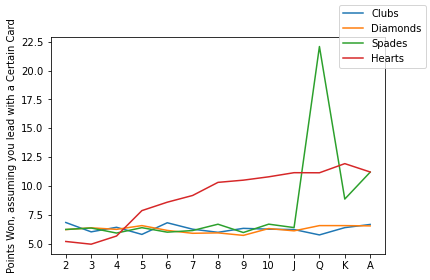

In [34]:
import math
gamma = .9
x = np.sum(res, axis = 0)/1000 * 26 
x = x * (13 / sum([math.pow(gamma,i) for i in range(13)]))

fig, ax = plt.subplots()
ax.plot(-x[0:13], label = "Clubs")
ax.plot(-x[13:26], label = "Diamonds")
ax.plot(-x[26:39], label = "Spades")
ax.plot(-x[39:52], label = "Hearts")
ax.set_xticklabels([str(i) for i in range(1,11)] + ['J', 'Q', 'K', 'A'])
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator())
plt.ylabel("Points Won, assuming you lead with a Certain Card")
fig.legend()

plt.savefig('saves/figVal.png',bbox_inches="tight")
plt.show()

/tmp/ipykernel_17476/2403991359.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(i) for i in range(1,11)] + ['J', 'Q', 'K', 'A'])


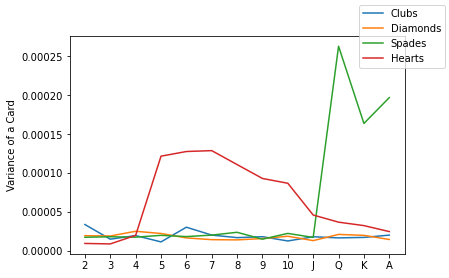

In [35]:
import math
gamma = .9
x = np.var(res, axis = 0)/1000 * 26 
x = x * (13 / sum([math.pow(gamma,i) for i in range(13)]))

fig, ax = plt.subplots()
ax.plot(x[0:13], label = "Clubs")
ax.plot(x[13:26], label = "Diamonds")
ax.plot(x[26:39], label = "Spades")
ax.plot(x[39:52], label = "Hearts")
ax.set_xticklabels([str(i) for i in range(1,11)] + ['J', 'Q', 'K', 'A'])
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator())
plt.ylabel("Variance of a Card")
fig.legend()

plt.savefig('saves/figVar.png',bbox_inches="tight")
plt.show()